## Descriptive Analysis on ECB Data
---------------------

In [98]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import aux_functions 

In [99]:
# read csv file
workingdir = os.getcwd()
# read cleaned_data.csv file
df = pd.read_csv(workingdir + '/ECB_Data.csv')

In [100]:
df

,date,speaker,title,extra_info,contents,speaker_position,interviewer
0,2024-02-07,Isabel Schnabel,Interview with Financial Times,conducted by Martin Arnold on 2 February 2024,"Now that inflation is fading, some say it was ...",Member of the Executive Board,Financial Times
1,2024-02-03,Frank Elderson,Interview with De Volkskrant,conducted by Jonathan Witteman on 29 January 2024,"In its introduction to the interview, the news...",Member of the Executive Board,De Volkskrant
2,2024-01-31,Luis de Guindos,Interview with Die Zeit,conducted by Kolja Rudzio,"Mr de Guindos, Germany is in a recession, the ...",Vice-President,Die Zeit
3,2024-01-22,Christine Lagarde,Thanks to Wolfgang Schäuble,published on n-tv,A Franco-German homage and appeal As a young ...,President,Wolfgang Schäuble
4,2024-01-13,Philip R. Lane,Interview with Corriere della Sera,conducted by Federico Fubini,The rate hike in September was meant to increa...,Member of the Executive Board,Corriere della Sera
...,...,...,...,...,...,...,...
531,2004-12-06,Otmar Issing,"Interview with Prof. Otmar Issing, (Delo, Slov...",published on 4 December 2004,,NaN,Prof
532,2004-10-18,José Manuel González-Páramo,"Interview with Mr José Manuel González-Páramo,...","by Mrs Marietta Kurm-Engels, Handelsblatt",,NaN,Mr José Manuel González-Páramo
533,2004-10-09,Jean-Claude Trichet,"Interview with Jean-Claude Trichet, President ...",Conducted by Corinne Lhaïk (L'Express) on 29 S...,,NaN,Jean-Claude Trichet
534,2004-08-08,Lucas Papademos,"Interview with Lucas Papademos, Vice-President...",Conducted by Beda Romano (Il Sole 24 Ore) on 5...,,NaN,Lucas Papademos


Remove every Na

In [101]:
# removing Nas
df = df.dropna()

Converting the data into desired type (everything columns are encoded as objects)

In [102]:
#types of data
df.dtypes

date                object
speaker             object
title               object
extra_info          object
contents            object
speaker_position    object
interviewer         object
dtype: object

In [103]:
import pandas as pd

# Load your data - assuming it's loaded into DataFrame 'df'
# df = pd.read_csv('your_file.csv')  # Uncomment this if you're reading from a CSV file

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert all other columns to string type, except 'date'
for col in df.columns:
    if col != 'date':
        df[col] = df[col].astype(str)

# Verify the data types
print(df.dtypes)


date                datetime64[ns]
speaker                     object
title                       object
extra_info                  object
contents                    object
speaker_position            object
interviewer                 object
dtype: object


/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_884/1260877922.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_884/1260877922.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str)
/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_884/1260877922.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

## Descriptive Analysis

1. Word Frequency Analysis


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mathieu26/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


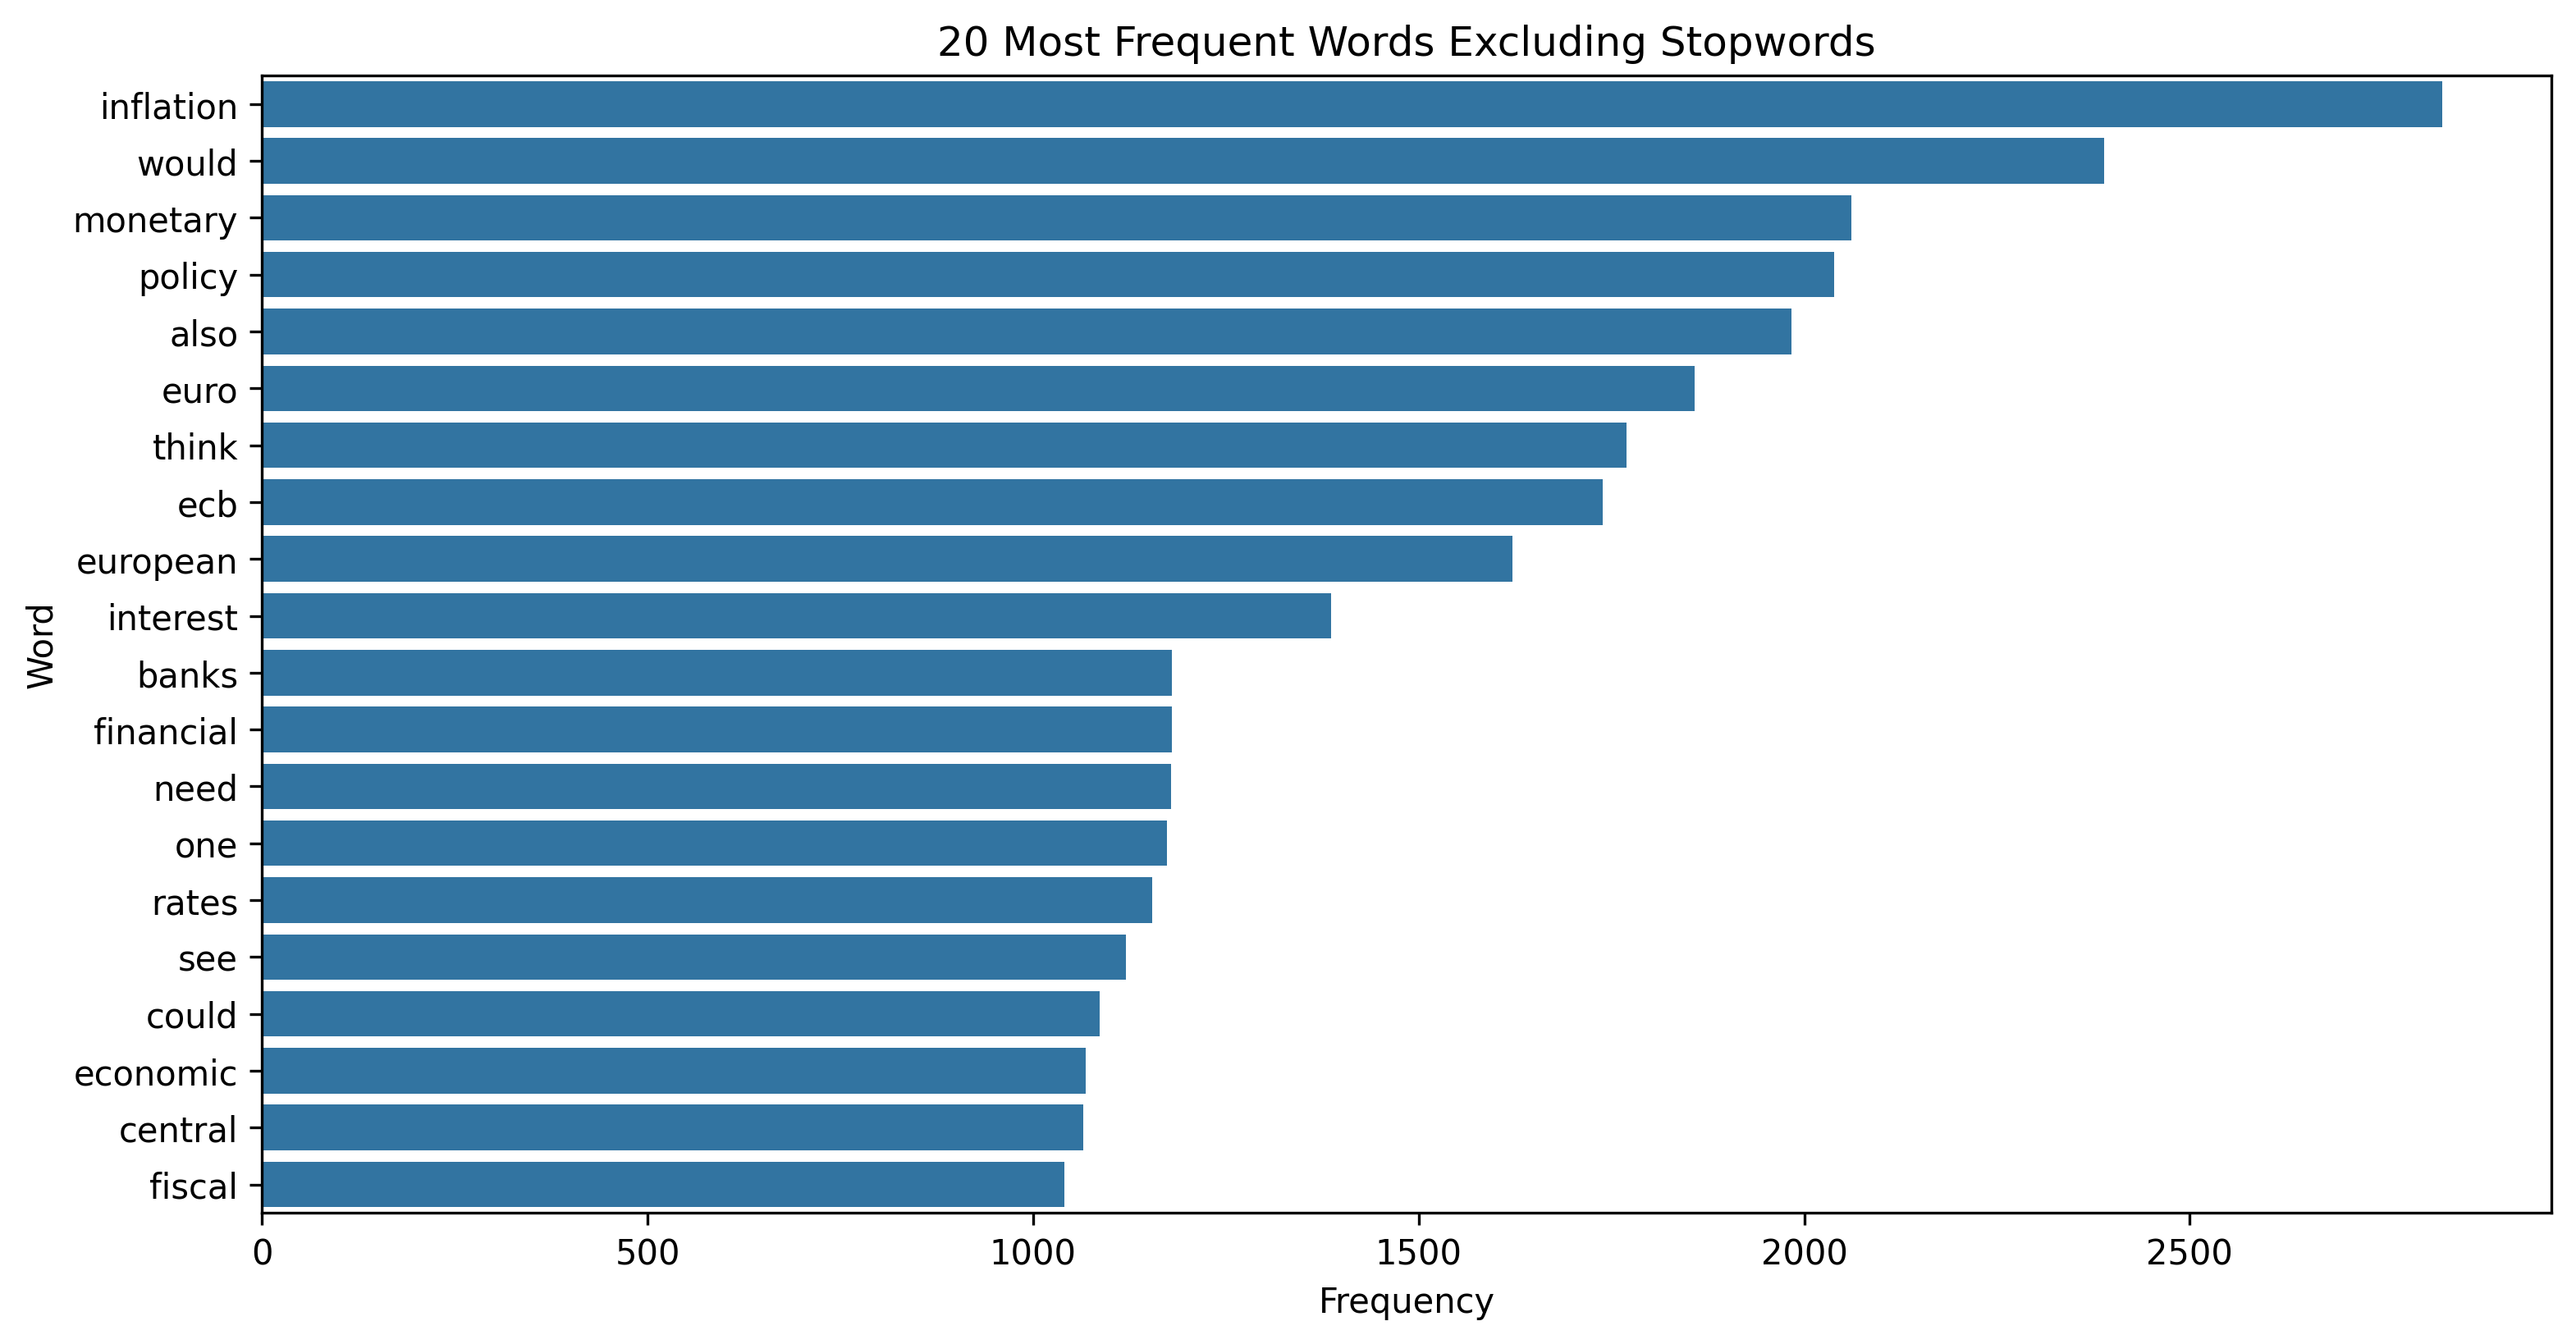

In [104]:
from collections import Counter
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that NLTK stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def word_frequency(df):
    # Join all texts in the 'contents' column
    all_text = ' '.join(df['contents'].tolist()).lower()
    words = all_text.split()
    # Filter out stopwords
    filtered_words = [word for word in words if word not in stop_words and word.isalpha()]
    frequency = Counter(filtered_words)
    return frequency.most_common()

# Apply the function
word_freq = word_frequency(df)

# If the result looks correct, proceed to plot
if word_freq:
    # Plots the 20 most frequent words
    plt.figure(figsize=(12, 6), dpi=300)
    df_plot = pd.DataFrame(word_freq, columns=['Word', 'Frequency']).head(20)
    sns.barplot(x='Frequency', y='Word', data=df_plot)
    plt.title('20 Most Frequent Words Excluding Stopwords')
    plt.show()


2. Sentiment Analysis


In [105]:
from textblob import TextBlob

def sentiment_analysis(df):
    df['sentiment'] = df['contents'].apply(lambda x: TextBlob(x).sentiment.polarity)
    return df

# Apply the function
df = sentiment_analysis(df)

/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_884/3035613002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['contents'].apply(lambda x: TextBlob(x).sentiment.polarity)


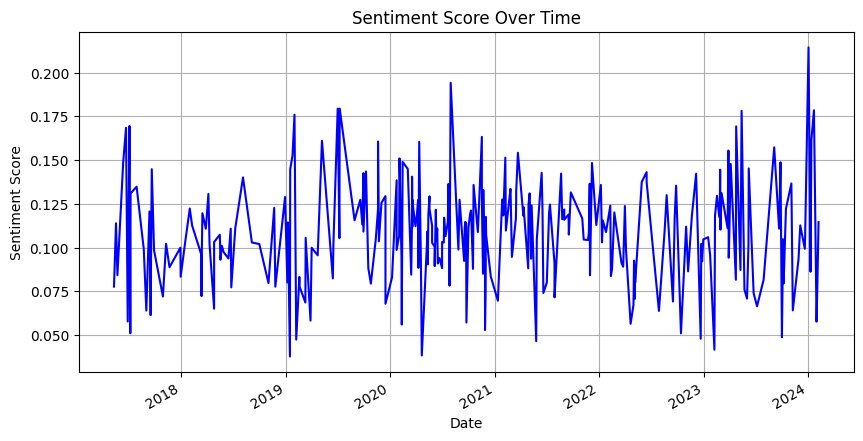

In [106]:
# Plot the sentiment over time
plt.figure(figsize=(10, 5))
df.sort_values('date').set_index('date')['sentiment'].plot(kind='line', color='blue')
plt.title('Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

The sentiment score calculated from the TextBlob library reflects the emotional tone of the content within the contents column of your DataFrame, which includes transcripts of interviews from the ECB on inflation. Here's how to interpret the sentiment score:

Polarity: This is a float within the range [-1.0, 1.0] where -1.0 denotes extreme negativity, 0 denotes neutrality, and 1.0 denotes extreme positivity. The sentiment.polarity attribute returns this polarity score for each text.

3. Topic Modeling

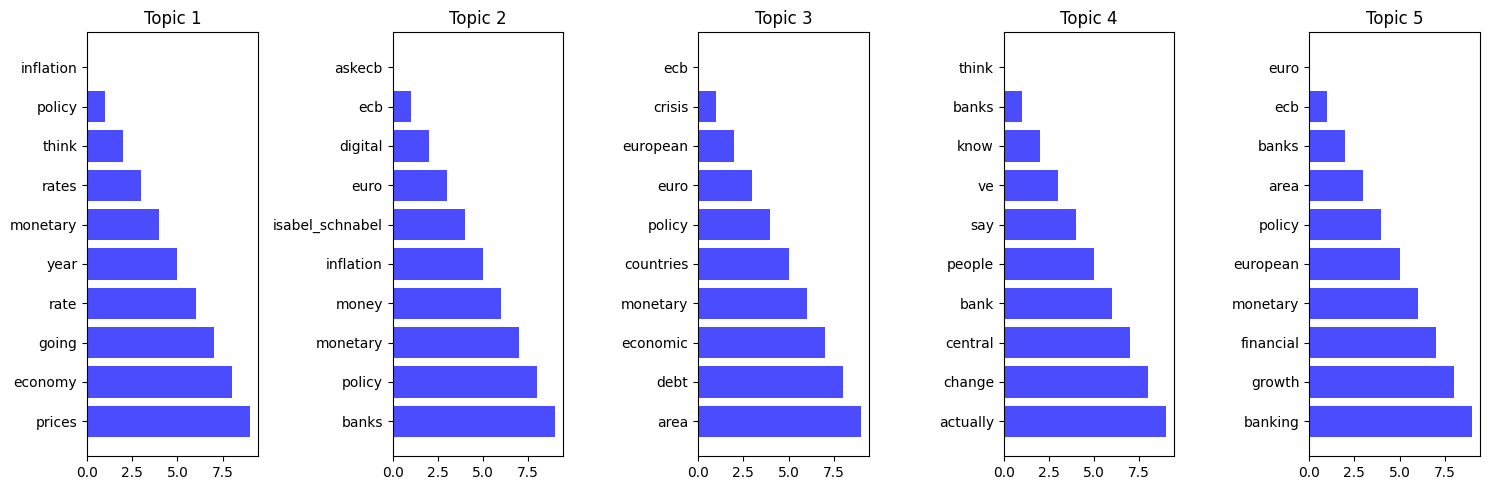

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

def topic_modeling(df, n_topics=5, n_words=10):
    vec = CountVectorizer(stop_words='english')
    X = vec.fit_transform(df['contents'])
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda.fit(X)
    feature_names = vec.get_feature_names_out()
    # Getting the top words for each topic
    top_words = []
    for topic_idx, topic in enumerate(lda.components_):
        top_features_ind = topic.argsort()[:-n_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        top_words.append(top_features)
    return lda, vec, top_words

# Apply the function
lda_model, vectorizer, top_words = topic_modeling(df)

# Now let's plot the top words per topic
def plot_top_words(top_words, n_topics=5):
    fig, axes = plt.subplots(1, n_topics, figsize=(15, 5), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic_words in enumerate(top_words):
        ax = axes[topic_idx]
        ax.barh(topic_words, range(len(topic_words)), color='blue', alpha=0.7)
        ax.set_title(f'Topic {topic_idx + 1}')
        ax.set_yticks(range(len(topic_words)))
        ax.set_yticklabels(topic_words)
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()
    plt.show()

plot_top_words(top_words)


4. Text Length Distribution


/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_884/2679857720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['contents'].apply(len)


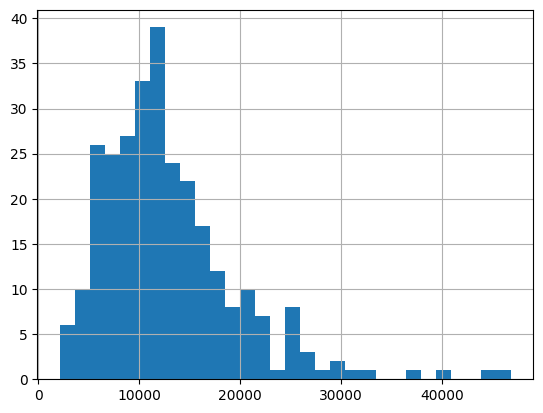

In [108]:
import matplotlib.pyplot as plt

def text_length_distribution(df):
    df['text_length'] = df['contents'].apply(len)
    df['text_length'].hist(bins=30)
    plt.show()

# Apply the function
text_length_distribution(df)


5. Readability Scores


In [109]:
import textstat

In [110]:
def readability_scores(df):
    df['readability'] = df['contents'].apply(textstat.flesch_reading_ease)
    return df

# Apply the function
df = readability_scores(df)

/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_884/3567504131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readability'] = df['contents'].apply(textstat.flesch_reading_ease)


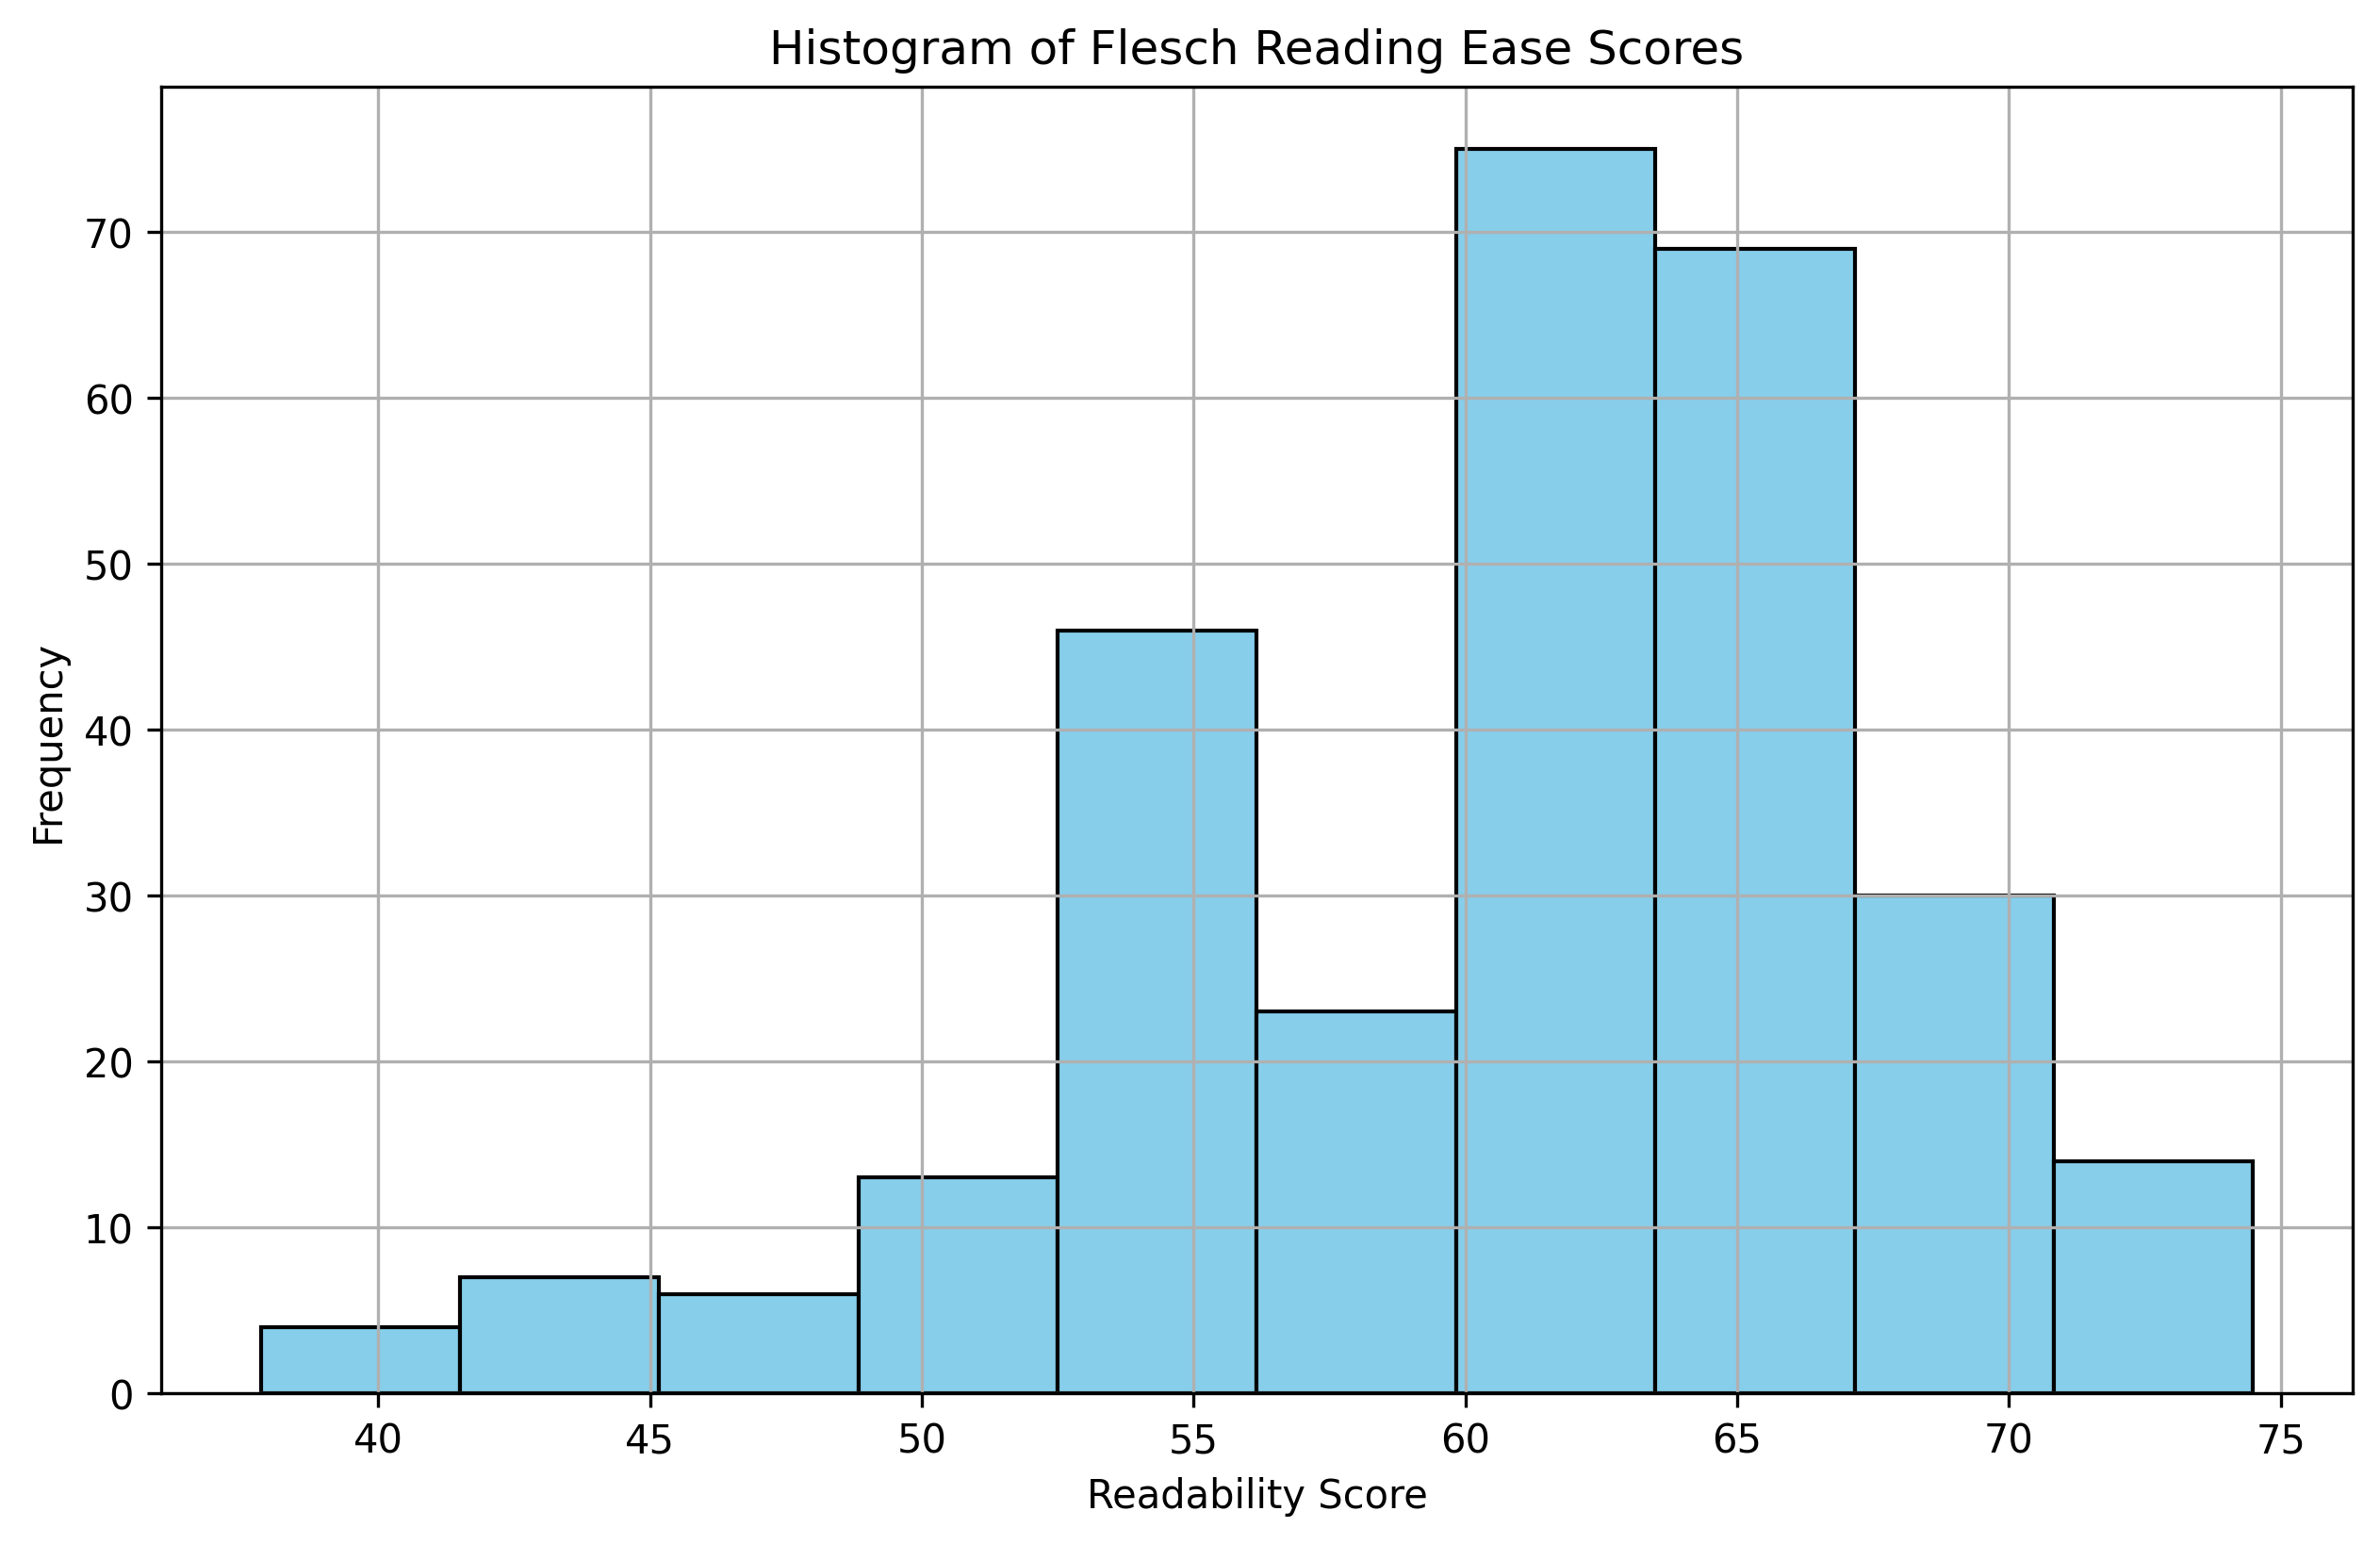

In [111]:
# Plotting the readability scores
plt.figure(figsize=(10, 6), dpi=300)
plt.hist(df['readability'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Flesch Reading Ease Scores')
plt.xlabel('Readability Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Interpretation:

The histogram of Flesch Reading Ease Scores you’ve provided shows the distribution of readability scores for your ECB interview transcripts dataset. The Flesch Reading Ease Score is a measure of how easy a text is to read. The scale runs from 0 to 100, with higher scores indicating material that is easier to read. Here’s a general guide for interpreting the scores:

+ 90-100: Very Easy (easily understood by an average 11-year-old student)
+ 80-90: Easy
+ 70-80: Fairly Easy
+ 60-70: Standard (easily understood by 13- to 15-year-old students)
+ 50-60: Fairly Difficult
+ 30-50: Difficult (best understood by university graduates)
+ 0-30: Very Confusing

6. Named Entity Recognition (NER)


In [112]:
import spacy

nlp = spacy.load('en_core_web_sm')

def named_entity_recognition(df):
    df['named_entities'] = df['contents'].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])
    return df

# Apply the function
df = named_entity_recognition(df)


/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_884/696261933.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['named_entities'] = df['contents'].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])


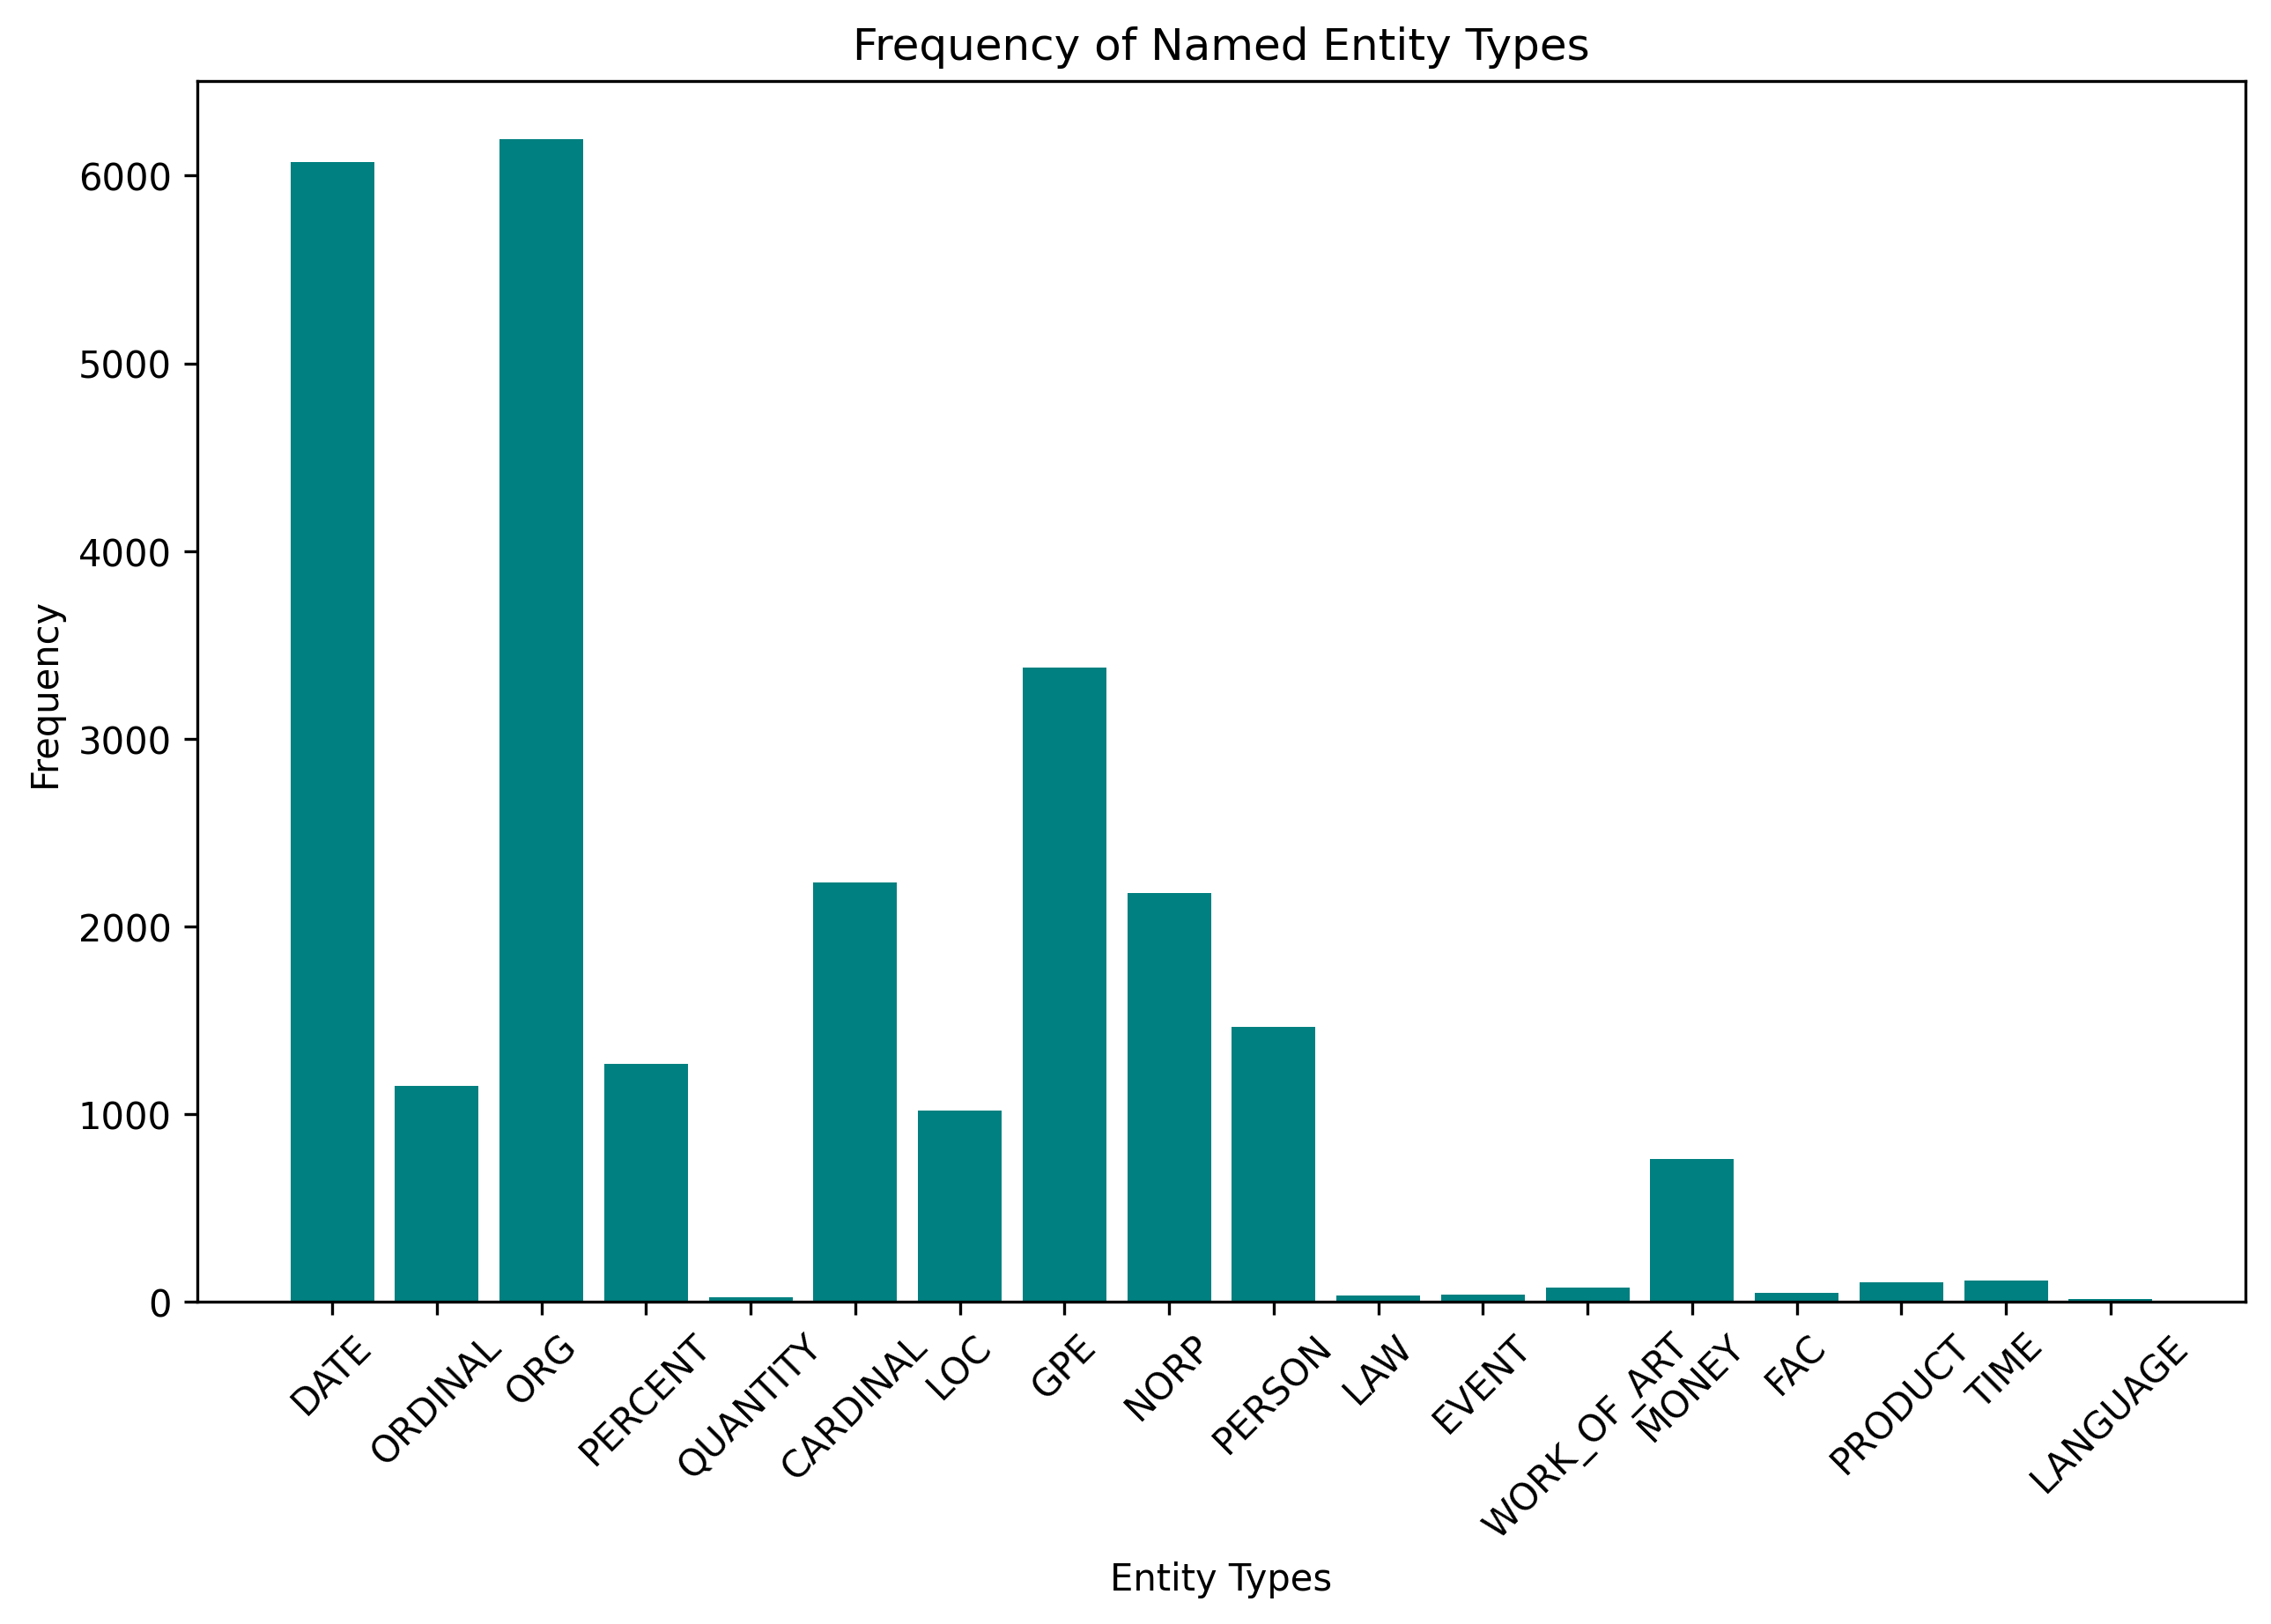

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from collections import Counter

# Extract all entity labels
all_labels = [label for sublist in df['named_entities'] for _, label in sublist]

# Count frequency of each label
label_freq = Counter(all_labels)

# Data for plotting
labels, freqs = zip(*label_freq.items())

# Plotting
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(labels, freqs, color='teal')
plt.title('Frequency of Named Entity Types')
plt.xlabel('Entity Types')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


The bar chart displaying the "Frequency of Named Entity Types" from your ECB interview transcripts provides insights into the kind of entities frequently mentioned in the discussions about inflation. Here's a breakdown of what each of these named entity types usually represents:

+ DATE: Refers to specific dates. The high frequency indicates many discussions about specific times, such as past events, deadlines, forecasts, or timeframes for economic policies.
+ ORDINAL: Represents "first", "second", "third", etc., which could be used to reference sequences or rankings, possibly related to economic indices or position statements.
+ ORG: Short for "organization", which could include banks, financial institutions, governments, and other bodies that are relevant to economic discussions.
+ PERCENT: Clearly essential in discussions of inflation, interest rates, and economic growth, where percentages are commonly used to express rates of change or proportions.
+ QUANTITY: This could refer to amounts of money, quantities in economic forecasts, or other numerical data.
+ CARDINAL: These are numbers that do not fall under another category and could refer to quantities, like fiscal numbers, statistical data, etc.
+ LOC: Short for "location", which could point to the mention of specific places important in the context of economic discussions, such as countries or regions experiencing different inflation rates.
+ GPE: Stands for "Geopolitical Entity", which would include countries, cities, states, etc., suggesting discussions may have involved comparisons of economic conditions across different regions.
+ NORP: Refers to nationalities or religious or political groups. This could indicate discussions around how different population groups are affected by or are responding to inflation.
+ PERSON: Implies that individuals are often referenced, which could be interviewees, economists, politicians, or key figures in finance and economics.
+ LAW: Points to legal or regulatory terms, which might come up in discussions of monetary policy, fiscal regulations, or legal frameworks affecting economic policy.
+ EVENT: Could involve specific events that have economic implications, such as policy announcements, market changes, or economic summits.

7. Co-occurrence of Key Terms


In [114]:
import pandas as pd
from collections import defaultdict

# Define key terms you are interested in
key_terms = ['inflation', 'policy', 'economy', 'rates', 'ECB']

def co_occurrence_matrix(df, key_terms):
    # Create a dictionary to hold pairs of key terms and their co-occurrence count
    co_occurrence = defaultdict(int)
    
    # Process each document
    for document in df['contents']:
        words = document.lower().split()
        # Find which key terms are in the current document
        terms_in_doc = set(term for term in key_terms if term in words)
        # Increment counts for each pair of terms found in the same document
        for term1 in terms_in_doc:
            for term2 in terms_in_doc:
                if term1 != term2:
                    co_occurrence[(term1, term2)] += 1
    
    # Turn the co_occurrence dictionary into a DataFrame for better readability
    return pd.DataFrame(list(co_occurrence.items()), columns=['Term Pair', 'Co-occurrence'])

# Apply the function
co_occurrence_df = co_occurrence_matrix(df, key_terms)


8. Trend Analysis Over Time


/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_884/3988713314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


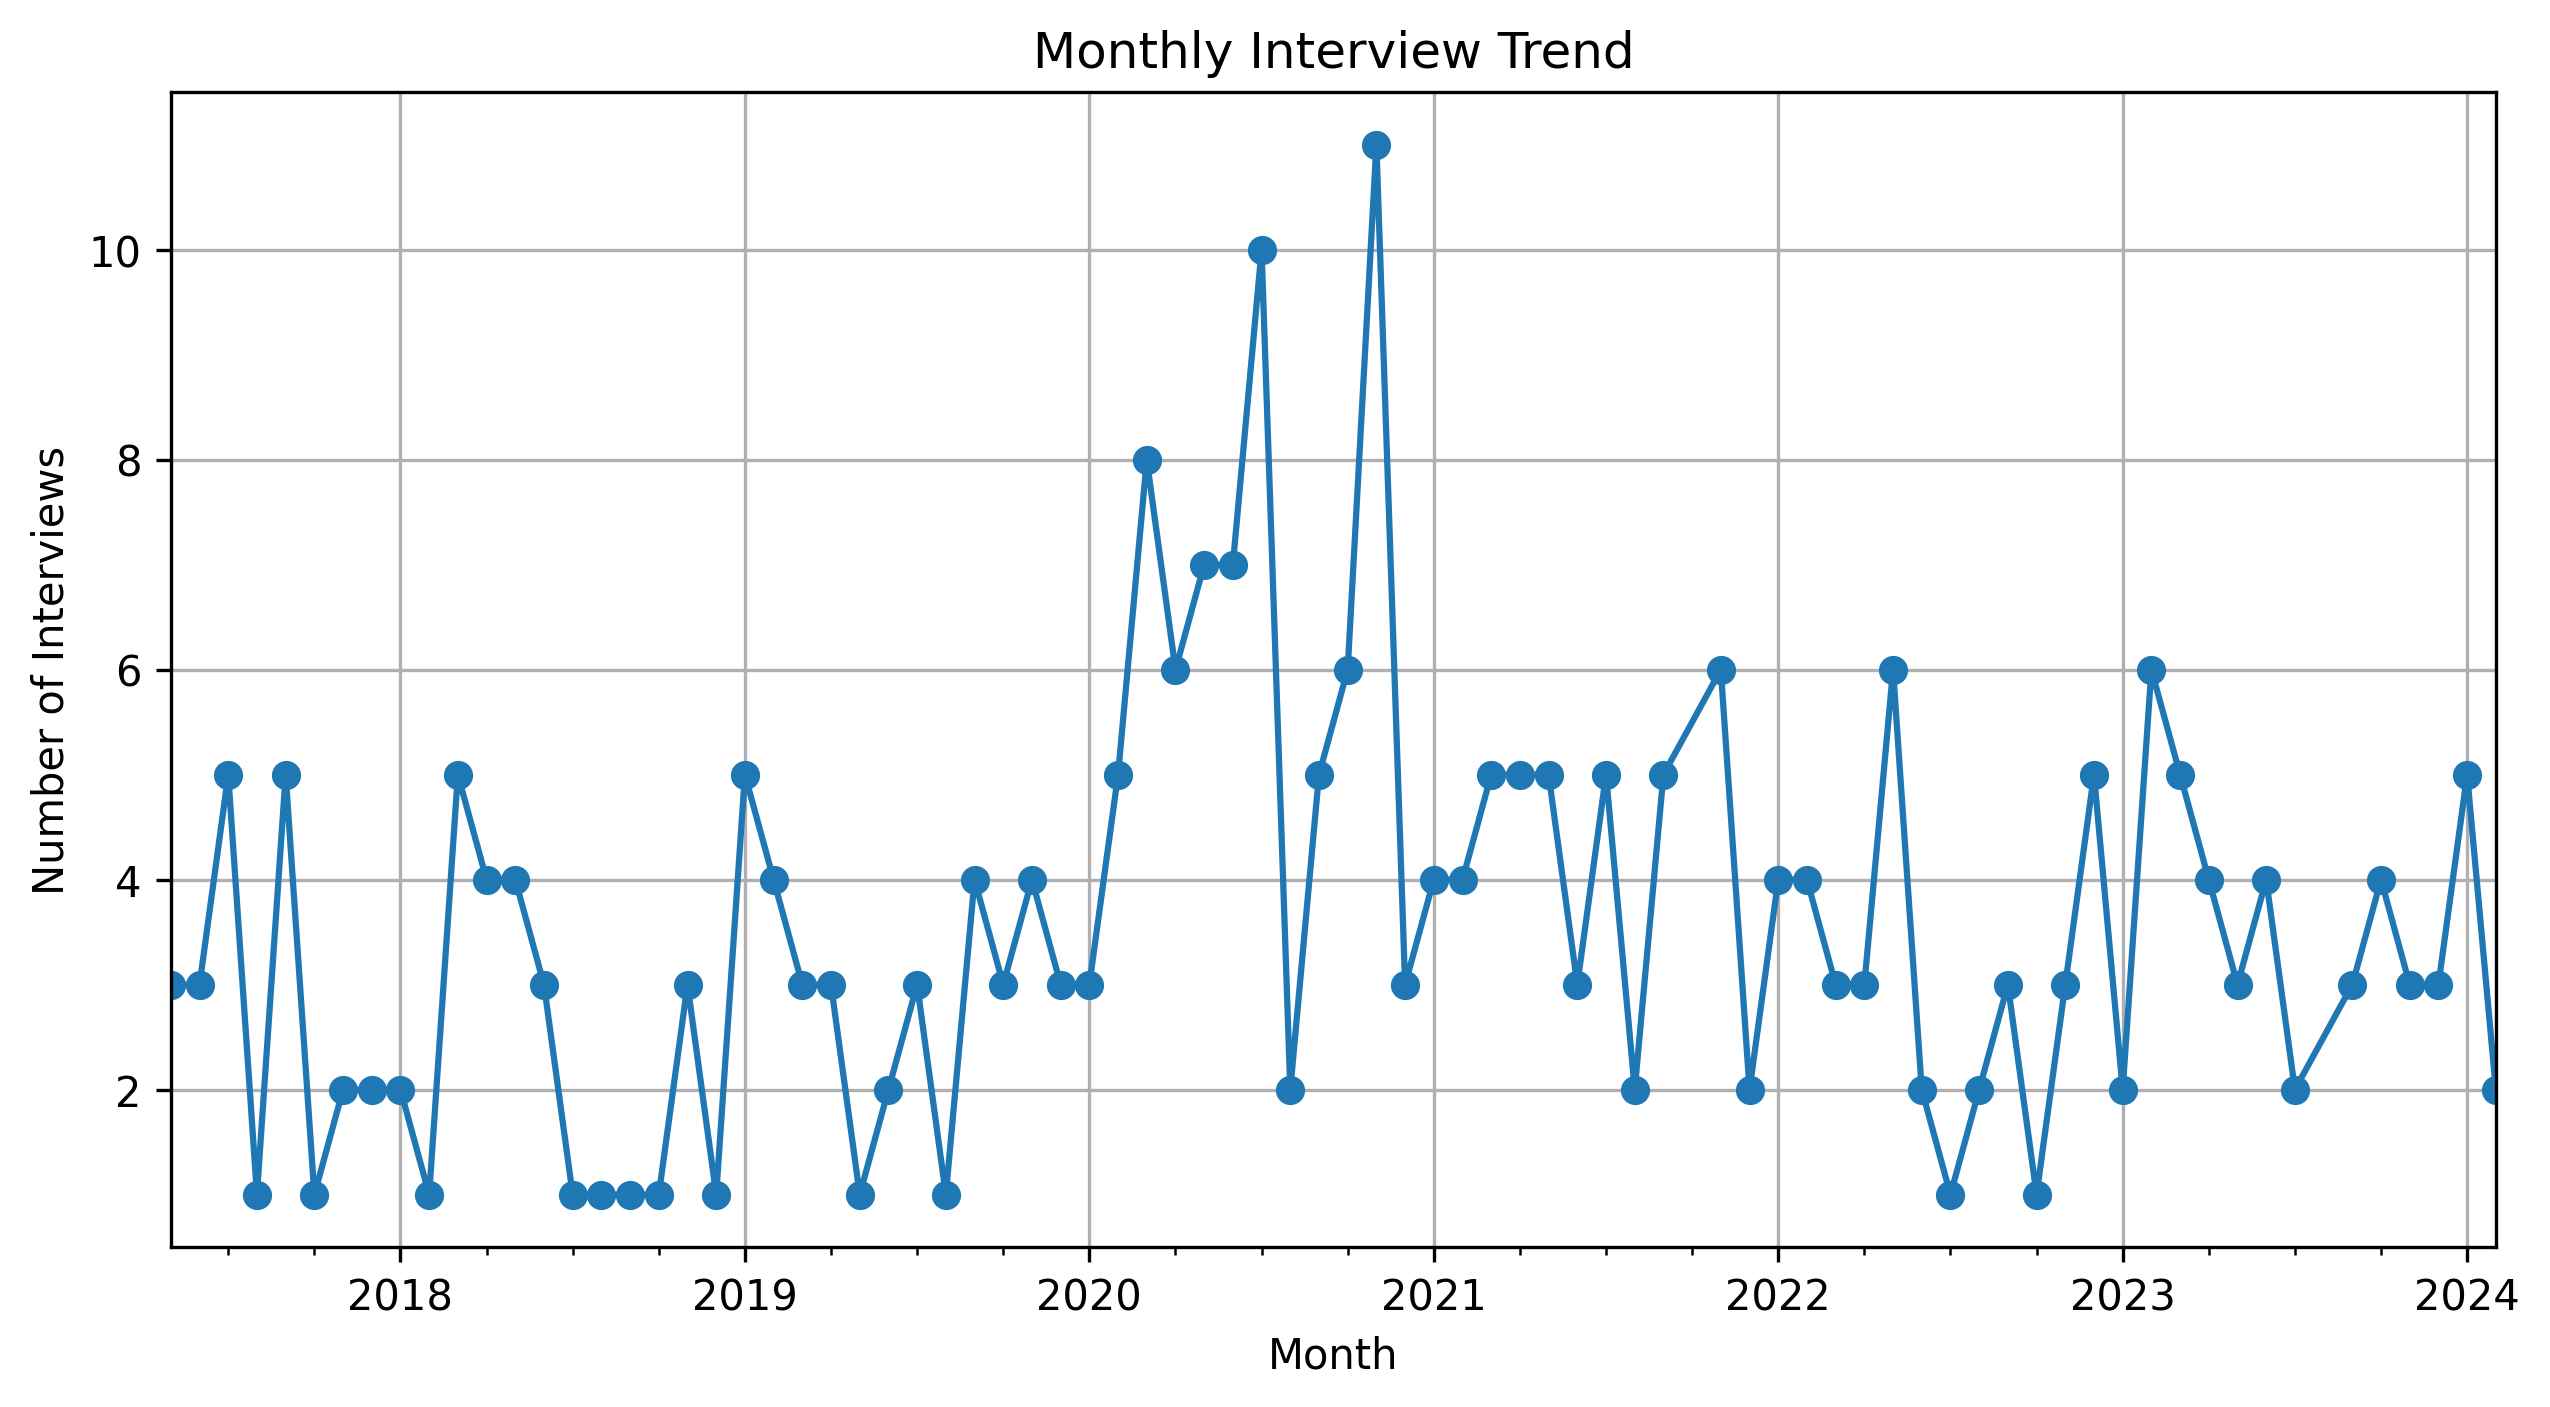

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'date' column is in a recognizable date format, if not, convert it
df['date'] = pd.to_datetime(df['date'])

def trend_analysis(df):
    # Group by Year-Month and count entries
    trend_data = df.groupby(df['date'].dt.to_period('M')).size()
    return trend_data

# Apply the function
monthly_trends = trend_analysis(df)

# Plotting the trend
plt.figure(figsize=(10, 5), dpi=300)
monthly_trends.plot(kind='line', marker='o', title='Monthly Interview Trend')
plt.xlabel('Month')
plt.ylabel('Number of Interviews')
plt.grid(True)
plt.show()


9. Keyword Extraction


In [116]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def extract_keywords(df, top_n=5):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df['contents'])
    feature_names = vectorizer.get_feature_names_out()
    
    # Create a list to store keywords for each document
    top_keywords = []

    # Loop through each row in the TF-IDF matrix
    for row in tfidf_matrix:
        # Get the indices of the top n features for this row
        top_n_idx = np.argsort(row.toarray().flatten())[-top_n:]
        # Get the corresponding feature names
        top_features = [feature_names[i] for i in top_n_idx]
        # Add the features as a string separated by commas
        top_keywords.append(", ".join(top_features))

    # Add the keywords as a new column to the DataFrame
    df['top_keywords'] = top_keywords
    return df

# Assume df is your DataFrame and it already has a column 'contents' with text data
# Apply the function
df = extract_keywords(df)

# Display the updated DataFrame
print(df[['contents', 'top_keywords']])


                                              contents  \
0    Now that inflation is fading, some say it was ...   
1    In its introduction to the interview, the news...   
2    Mr de Guindos, Germany is in a recession, the ...   
3    A Franco-German homage and appeal  As a young ...   
4    The rate hike in September was meant to increa...   
..                                                 ...   
285  Mr Praet, you are a Belgian who was born in Ge...   
286  Benoît Cœuré, thank you so much for speaking t...   
287  In the United States, the administration wants...   
288  The data has improved since the last Governing...   
289  So let's kick off straight away with the topic...   

                                         top_keywords  
0                money, policy, mile, inflation, star  
1    politicians, gases, ing, milieudefensie, climate  
2          economy, growth, rates, germany, inflation  
3      friendship, franco, german, schäuble, wolfgang  
4                   dat

/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_884/4127389810.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['top_keywords'] = top_keywords


10. Language Detection


In [117]:
from langdetect import detect

def detect_language(df):
    df['language'] = df['contents'].apply(detect)
    return df

# Apply the function
df = detect_language(df)



/var/folders/fx/j6fbl16n4dx92c8z30z6z7fh0000gn/T/ipykernel_884/2172205828.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df['contents'].apply(detect)


In [118]:
df.head(50)

,date,speaker,title,extra_info,contents,speaker_position,interviewer,sentiment,text_length,readability,named_entities,top_keywords,language
0,2024-02-07,Isabel Schnabel,Interview with Financial Times,conducted by Martin Arnold on 2 February 2024,"Now that inflation is fading, some say it was ...",Member of the Executive Board,Financial Times,0.114639,21169,64.61,"[(decades, DATE), (second, ORDINAL), (ECB, ORG...","money, policy, mile, inflation, star",en
1,2024-02-03,Frank Elderson,Interview with De Volkskrant,conducted by Jonathan Witteman on 29 January 2024,"In its introduction to the interview, the news...",Member of the Executive Board,De Volkskrant,0.079821,6434,61.46,"[(September 2023, DATE), (November 2023, DATE)...","politicians, gases, ing, milieudefensie, climate",en
2,2024-01-31,Luis de Guindos,Interview with Die Zeit,conducted by Kolja Rudzio,"Mr de Guindos, Germany is in a recession, the ...",Vice-President,Die Zeit,0.057706,7984,65.62,"[(de Guindos, PERSON), (Germany, GPE), (a year...","economy, growth, rates, germany, inflation",en
3,2024-01-22,Christine Lagarde,Thanks to Wolfgang Schäuble,published on n-tv,A Franco-German homage and appeal As a young ...,President,Wolfgang Schäuble,0.178547,4024,48.03,"[(Franco, NORP), (the German Bundestag, ORG), ...","friendship, franco, german, schäuble, wolfgang",en
4,2024-01-13,Philip R. Lane,Interview with Corriere della Sera,conducted by Federico Fubini,The rate hike in September was meant to increa...,Member of the Executive Board,Corriere della Sera,0.161673,12089,61.56,"[(September, DATE), (ECB, ORG), (first, ORDINA...","data, rate, cent, wage, inflation",en
5,2024-01-10,Isabel Schnabel,Q&A on X,conducted and published on 10 January 2024,"Hi all, this is @Isabel_Schnabel, Executive Bo...",Member of the Executive Board,X,0.086233,20237,55.84,"[(Executive Board, ORG), (ECB, ORG), (the next...","money, ecb, html, isabel_schnabel, askecb",en
6,2024-01-03,Christine Lagarde,Tribute article on Wolfgang Schäuble for Die Zeit,Tribute article on Wolfgang Schäuble for Die Z...,"When I think of Wolfgang Schäuble, the first i...",President,Wolfgang Schäuble for Die Zeit,0.214484,3078,59.33,"[(Wolfgang Schäuble, PERSON), (first, ORDINAL)...","dear, friend, germany, europe, wolfgang",en
7,2023-12-22,Isabel Schnabel,Interview with Süddeutsche Zeitung,conducted by Meike Schreiber und Markus Zydra ...,"Inflation has recently fallen to 2.4%, more ra...",Member of the Executive Board,Süddeutsche Zeitung,0.105602,9823,66.23,"[(2.4%, PERCENT), (2%, PERCENT), (Germany, GPE...","profits, minimum, excess, banks, inflation",en
8,2023-12-21,Luis de Guindos,Interview with 20 Minutos,conducted by Emilio Ordiz and Jorge Millán,Wage cost data in Spain point to an increase o...,Vice-President,20 Minutos,0.099390,11165,63.90,"[(Spain, GPE), (4.7%, PERCENT), (ECB, ORG), (C...","completing, inflation, policy, union, fiscal",en
9,2023-12-05,Isabel Schnabel,Interview with Reuters,conducted by Balázs Korányi on 1 December 2023,What is your take on the unexpectedly benign N...,Member of the Executive Board,Reuters,0.112759,13566,63.90,"[(November, DATE), (John Maynard Keynes, PERSO...","balance, growth, inflation, going, sheet",en
